In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
pd.options.display.max_columns = None
pd.options.display.max_rows = 50 
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv(r"C:/Users/senth/Downloads/MonthWiseMarketArrivals_Clean.csv",sep=",", encoding='cp1252')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2005-01-01', '2006-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2005-02-01', '2006-02-01',
               ...
               '2006-12-01', '2007-12-01', '2008-12-01', '2009-12-01',
               '2010-12-01', '2011-12-01', '2012-12-01', '2013-12-01',
               '2014-12-01', '2015-12-01'],
              dtype='datetime64[ns]', name='date', length=10227, freq=None)

In [4]:
df.sort_index(inplace=True)
df.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON
1996-06-01,LASALGAON(MS),June,1996,175308,229,413,367,MS,LASALGAON
1996-07-01,LASALGAON(MS),July,1996,156282,229,406,368,MS,LASALGAON
1996-08-01,LASALGAON(MS),August,1996,173892,164,388,340,MS,LASALGAON
1996-09-01,LASALGAON(MS),September,1996,138648,145,363,317,MS,LASALGAON


In [5]:
columns=['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'state']

In [6]:
Onions= df.drop(columns,axis=1)
Onions.head()

,priceMod,city
date,,
1996-01-01,226,LASALGAON
1996-02-01,186,LASALGAON
1996-03-01,243,LASALGAON
1996-04-01,254,LASALGAON
1996-05-01,269,LASALGAON


In [7]:
New=pd.DataFrame(Onions[Onions.city=="MUMBAI"]["priceMod"])
New

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405
...,...
2015-10-01,3748
2015-11-01,2623
2015-12-01,1542


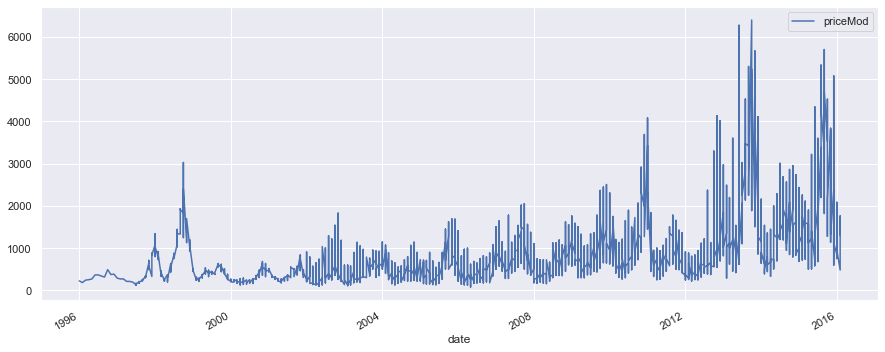

In [8]:
Onions.plot(figsize=(15, 6))
plt.show()

In [9]:
y = Onions['priceMod'].resample('MS').mean() # MS = Monthly Start
y

date
1996-01-01    226.00
1996-02-01    186.00
1996-03-01    243.00
1996-04-01    254.00
1996-05-01    269.00
               ...  
2015-10-01   2838.79
2015-11-01   2101.06
2015-12-01   1427.52
2016-01-01   1186.46
2016-02-01    926.35
Freq: MS, Name: priceMod, Length: 242, dtype: float64

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

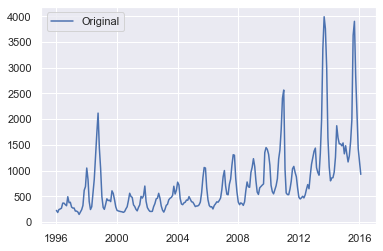

In [11]:
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

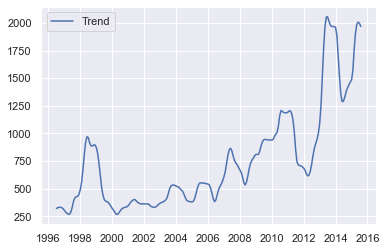

In [12]:
trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

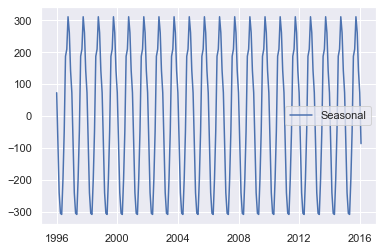

In [13]:
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

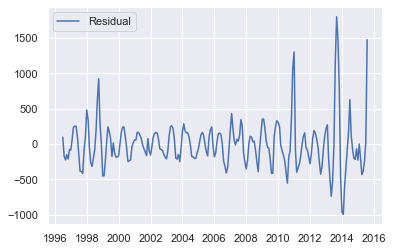

In [14]:
residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [15]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.552957
p-value: 0.507171
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

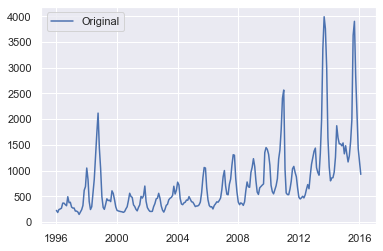

In [17]:
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

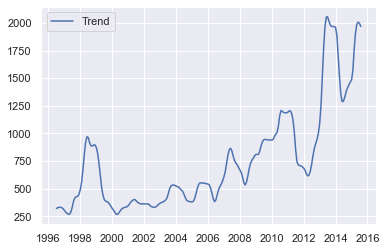

In [18]:
trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

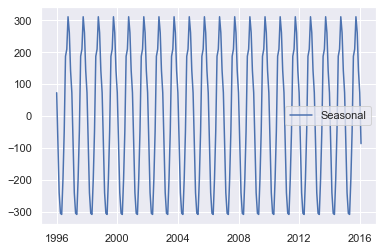

In [19]:
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

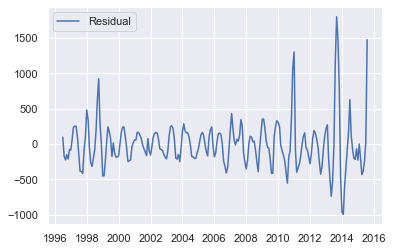

In [20]:
residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
from pylab import rcParams
fr=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            fr.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4022.9705236045165
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3758.8207346926347
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3639.422542603922
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3369.3261717394653
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3648.8387262242145
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3509.549059869377
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3368.3149004536717
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3347.0036820671567
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3719.267301261051
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3487.548678046268
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3425.6347629317424
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3151.354251665221
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3438.3257752282984
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3290.689568605358
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3171.9337705787666
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3130.779469528682
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3409.2400086977204
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3251.809090410973


In [23]:
np.min(fr)

2987.4316043420595

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4577      0.046     10.030      0.000       0.368       0.547
ma.S.L12      -0.9043      0.058    -15.620      0.000      -1.018      -0.791
sigma2       6.29e+04   2636.315     23.858      0.000    5.77e+04    6.81e+04


In [25]:
results

C:\Users\senth\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


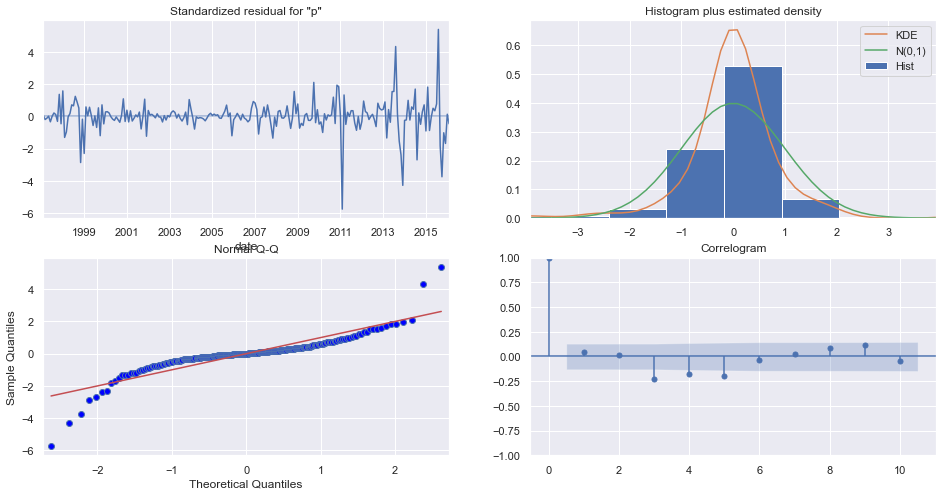

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

C:\Users\senth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


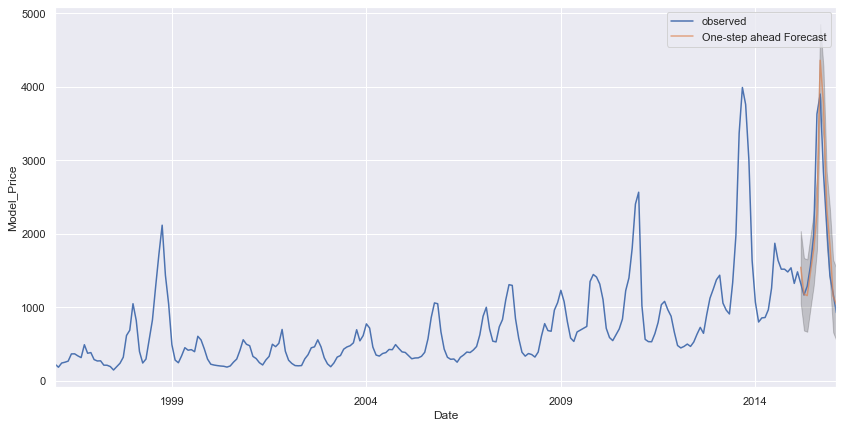

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2015-03-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1996':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Model_Price')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-03-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 274879.5


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 524.29


In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

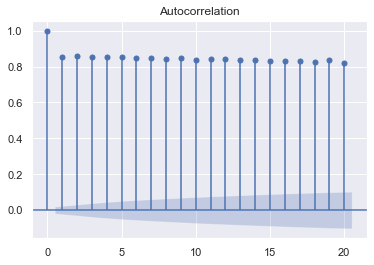

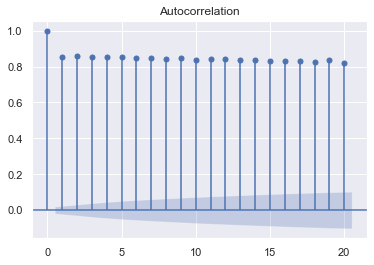

In [34]:
plot_acf(df['priceMod'].tolist(), lags=20)

            lower priceMod  upper priceMod
2016-03-01          233.83         1218.54
2016-04-01         -201.66         1539.00
2016-05-01         -449.85         1806.28
2016-06-01         -510.54         2163.48
2016-07-01         -486.08         2548.82
2016-08-01         -302.04         3055.16
2016-09-01         -322.36         3328.82
2016-10-01         -483.54         3439.64
2016-11-01         -730.70         3446.81
2016-12-01        -1039.22         3378.00
2017-01-01        -1250.52         3394.05
2017-02-01        -1529.00         3332.17
2017-03-01        -1799.51         3297.37


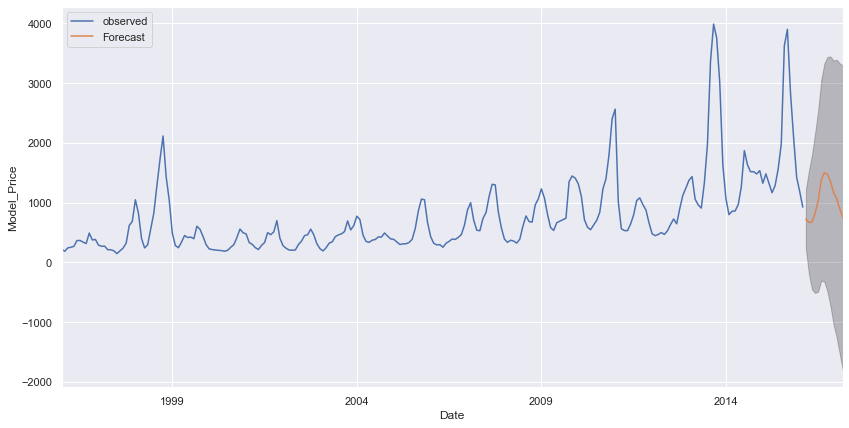

In [35]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Model_Price')
print(pred_ci)
plt.legend()
plt.show()